In [1]:
import json
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10.0, 10.0]

### Examples for Classification

In [2]:
from compose import Compose4Image
import image_transforms

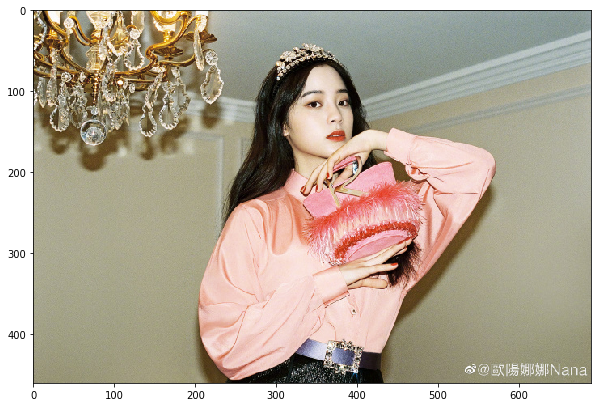

In [3]:
# Loading RGB image
img_path = 'nana.jpg'
img = io.imread(img_path)
# Showing original image
plt.imshow(img)

In [4]:
# Instance
transform = Compose4Image([
    image_transforms.Translate(0.5, 0.3, random=True)
                          ])

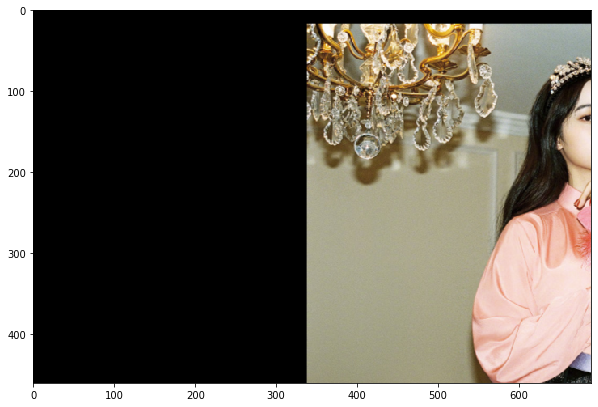

In [5]:
output = transform(img)
plt.imshow(output)

### Examples for Detection

In [6]:
from compose import Compose4Image_Box
import image_box_transforms

In [7]:
def labelme2list(file_path):
    """
    It's to process Polygon annotations.
    :param file_path: the path of single labelme annotation file.
    :return: polygon annotations. (list type)
    pts = np.array(labelme2list(paths[index]), np.int32)
    heatmap = cv2.polylines(heatmap, [pts[0]], True, 1, lineType=cv2.LINE_8)
    """
    with open(file_path, 'r') as file:
        json_file = json.load(file)
    annos = json_file['shapes']
    return np.array([np.hstack(anno['points']) for anno in annos]).astype(np.int32)

def draw_bbox(img, pts):
    """
    :param img: 
    :param pts: [xmin, ymin, xmax, ymax, ...]
    :return: 
    """

#     pts = labelme2list(file_path)
#     heatmap = np.zeros((height, width), np.uint8)
    img = img.copy()
    if pts.size != 0:
        for pt in pts:
            img = cv2.rectangle(img, tuple(pt[:2]), tuple(pt[2:4]), (255,105,180), 2) # Hot pink for Nana
    return img

def transfer_points(pts, width, height):
    """修正bbox、删除一些超出图像的框
    :param pts: ndarray of [n, m], pt: [xmin, ymin, xmax, ymax, ...]
    :return: [xmin, ymin, xmax, ymax, ...]
    """
    pts[:, 2] += (pts[:, 0] + 1)
    pts[:, 3] += (pts[:, 1] + 1)
    pts[:, [0, 2]] = np.clip(pts[:, [0, 2]], 0, width)
    pts[:, [1, 3]] = np.clip(pts[:, [1, 3]], 0, height)
    idxes = np.where((pts[:, 2] - pts[:, 0]) * (pts[:, 3] - pts[:, 1]) != 0)
    return pts[idxes]

    
    
    
    


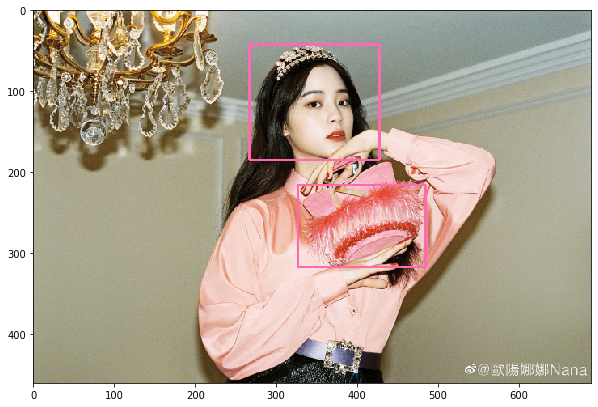

In [8]:
# Loading RGB image
img_path = 'nana.jpg'
file_path = img_path.replace('jpg', 'json')
img = io.imread(img_path)
pts = labelme2list(file_path) # xmin, ymin, xmax, ymax
# Showing original image
img_bboxes = draw_bbox(img, pts)
pts[:, [2, 3]] -= (pts[:, [0, 1]] + 1)
plt.imshow(img_bboxes)



In [9]:
detection_transform = Compose4Image_Box([
#     image_box_transforms.HorizontalFlip(),
#     image_box_transforms.VerticalFlip(),
#     image_box_transforms.Flip_Rotate()
#     image_box_transforms.Rotate(0),
#     image_box_transforms.Resize(500, 500)
#     image_box_transforms.Fixed_Ratio_Resize(1200, 300)
    image_box_transforms.WarpAffine(-180, 100)
#     image_box_transforms.Translate(translate_x=0.9, translate_y=0.9, random=True)
    
    
])

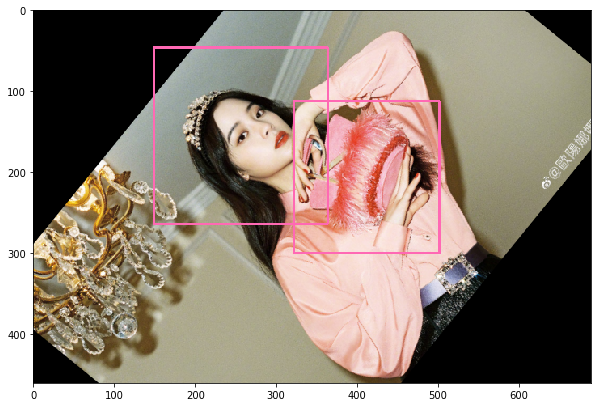

In [10]:

image, points = detection_transform(img.copy(), pts.copy())
points = transfer_points(points, image.shape[1], image.shape[0])

plt.imshow(draw_bbox(image, points))